In [1]:
pip install pandas numpy tensorflow scikit-learn matplotlib openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
load_data = pd.read_excel('LoadTexasERCOT.xlsx')
weather_station1 = pd.read_excel('WeatherStation1.xlsx')
weather_station3 = pd.read_excel('WeatherStation3.xlsx')

In [4]:
load_data.shape, weather_station1.shape,weather_station3.shape

((35064, 10), (35064, 8), (35064, 8))

In [5]:
weather_station1.head(), weather_station3.head(), load_data.head()

(   Year  Month  Day  Hour  Minute  Relative Humidity  Temperature  Pressure
 0  2012      1    1     0      30              39.19            6       950
 1  2012      1    1     1      30              44.45            5       950
 2  2012      1    1     2      30              53.94            4       950
 3  2012      1    1     3      30              63.77            2       960
 4  2012      1    1     4      30              71.93            2       960,
    Year  Month  Day  Hour  Minute  Relative Humidity  Temperature  Pressure
 0  2012      1    1     0      30              42.80            6       960
 1  2012      1    1     1      30              56.15            5       960
 2  2012      1    1     2      30              63.72            3       960
 3  2012      1    1     3      30              69.80            2       960
 4  2012      1    1     4      30              74.92            1       970,
                  Hour_End        COAST        EAST     FAR_WEST       NOR

In [6]:
load_data['Hour_End'] = pd.to_datetime(load_data['Hour_End'])
weather_station1['DateTime'] = pd.to_datetime(weather_station1[['Year', 'Month', 'Day', 'Hour']])
weather_station3['DateTime'] = pd.to_datetime(weather_station3[['Year', 'Month', 'Day', 'Hour']])
weather_station1.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
weather_station3.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)

In [7]:
weather_station1.head(), weather_station3.head(), load_data.head()

(   Minute  Relative Humidity  Temperature  Pressure            DateTime
 0      30              39.19            6       950 2012-01-01 00:00:00
 1      30              44.45            5       950 2012-01-01 01:00:00
 2      30              53.94            4       950 2012-01-01 02:00:00
 3      30              63.77            2       960 2012-01-01 03:00:00
 4      30              71.93            2       960 2012-01-01 04:00:00,
    Minute  Relative Humidity  Temperature  Pressure            DateTime
 0      30              42.80            6       960 2012-01-01 00:00:00
 1      30              56.15            5       960 2012-01-01 01:00:00
 2      30              63.72            3       960 2012-01-01 02:00:00
 3      30              69.80            2       960 2012-01-01 03:00:00
 4      30              74.92            1       970 2012-01-01 04:00:00,
                  Hour_End        COAST        EAST     FAR_WEST       NORTH  \
 0 2012-01-01 01:00:00.003  7748.160500  8

In [8]:
merged_data = pd.merge(load_data, weather_station1, left_on='Hour_End', right_on='DateTime')
merged_data = pd.merge(merged_data, weather_station3, left_on='Hour_End', right_on='DateTime', suffixes=('_w1', '_w3'))

In [9]:
merged_data

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT,Minute_w1,Relative Humidity_w1,Temperature_w1,Pressure_w1,DateTime_w1,Minute_w3,Relative Humidity_w3,Temperature_w3,Pressure_w3,DateTime_w3
0,2012-01-01 03:00:00,7337.789042,817.995707,1296.491345,631.940923,8461.317967,1961.909818,3946.994332,840.902848,25295.341984,30,63.77,2,960,2012-01-01 03:00:00,30,69.80,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,6852.747302,883.708533,1329.677512,662.237775,8880.412604,1874.075024,4037.150795,892.341115,25412.350661,30,79.76,0,960,2012-01-01 06:00:00,30,75.63,0,970,2012-01-01 06:00:00
2,2012-01-01 09:00:00,6855.467450,1023.689606,1385.977171,732.202793,10033.068791,2087.598732,4570.655862,1009.202331,27697.862737,30,48.63,6,960,2012-01-01 09:00:00,30,45.26,6,970,2012-01-01 09:00:00
3,2012-01-01 12:00:00,7693.585339,974.715669,1362.688806,713.185070,9879.117595,2307.264867,4765.119321,964.065395,28659.742062,30,25.26,12,960,2012-01-01 12:00:00,30,29.36,12,970,2012-01-01 12:00:00
4,2012-01-01 15:00:00,7700.107915,921.311601,1302.391474,672.284213,9320.712487,2253.088829,4533.564483,895.595594,27599.056595,30,23.44,12,960,2012-01-01 15:00:00,30,27.66,11,970,2012-01-01 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,10105.650088,1524.898001,2170.506827,942.371091,14767.295991,3049.009470,6589.495961,1366.707739,40515.935167,30,95.18,4,950,2015-12-31 09:00:00,30,100.00,1,960,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,10303.961071,1396.724156,2118.313650,878.926194,13089.338839,3165.359246,6182.120369,1309.101953,38443.845478,30,86.81,7,950,2015-12-31 12:00:00,30,96.39,4,960,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,10001.683042,1255.968361,2065.875618,797.959780,11855.540651,3138.473636,5820.402679,1183.585632,36119.489399,30,83.39,6,950,2015-12-31 15:00:00,30,89.95,4,960,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,10703.575699,1341.750663,2173.808470,868.636393,13411.928148,3340.356277,6312.753451,1229.206403,39382.015504,30,72.86,-2,950,2015-12-31 18:00:00,30,70.93,-2,960,2015-12-31 18:00:00


In [10]:
merged_data.rename(columns={'Temperature_w3': 'Temperature'}, inplace=True)

In [11]:
merged_data.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT,Minute_w1,Relative Humidity_w1,Temperature_w1,Pressure_w1,DateTime_w1,Minute_w3,Relative Humidity_w3,Temperature,Pressure_w3,DateTime_w3
0,2012-01-01 03:00:00,7337.789042,817.995707,1296.491345,631.940923,8461.317967,1961.909818,3946.994332,840.902848,25295.341984,30,63.77,2,960,2012-01-01 03:00:00,30,69.80,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,6852.747302,883.708533,1329.677512,662.237775,8880.412604,1874.075024,4037.150795,892.341115,25412.350661,30,79.76,0,960,2012-01-01 06:00:00,30,75.63,0,970,2012-01-01 06:00:00
2,2012-01-01 09:00:00,6855.467450,1023.689606,1385.977171,732.202793,10033.068791,2087.598732,4570.655862,1009.202331,27697.862737,30,48.63,6,960,2012-01-01 09:00:00,30,45.26,6,970,2012-01-01 09:00:00


## Normalizing the data

In [12]:
scaler = StandardScaler()
load_scaled = scaler.fit_transform(merged_data['ERCOT'].values.reshape(-1, 1))
temp_scaled = scaler.fit_transform(merged_data['Temperature'].values.reshape(-1, 1))

In [13]:
load_scaled.shape

(11687, 1)

In [14]:
temp_scaled.shape

(11687, 1)

## Creating Input features

In [15]:
def create_sequences(data, time_steps):
    sequences = []
    labels = []
    
    for i in range(len(data) - time_steps):
        seq = data[i:(i + time_steps)]
        label = data[i + time_steps]
        sequences.append(seq)
        labels.append(label)
        
    return np.array(sequences), np.array(labels)

# Use the function
time_steps = 1
X, y = create_sequences(load_scaled, time_steps)
X.shape , y.shape

((11686, 1, 1), (11686, 1))

## Train/test split

In [16]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Building the l ass tm model

In [17]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5537 - val_loss: 0.3215
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2709 - val_loss: 0.3301
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2680 - val_loss: 0.3201
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2732 - val_loss: 0.3296
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2705 - val_loss: 0.3237
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2648 - val_loss: 0.3225
Epoch 7/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2695 - val_loss: 0.3334
Epoch 8/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2708 - val_loss: 0.3248
Epoch 9/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2679 - val_loss: 0.3230
Epoch 10/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2669 - val_loss: 0.3300
Epoch 11/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2630 - val_loss: 0.3267
Epoch 12/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [19]:
predictions = model.predict(X_test)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [20]:
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

In [21]:
mae = mean_absolute_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 4.67115841815344, RMSE: 5.869861038102909


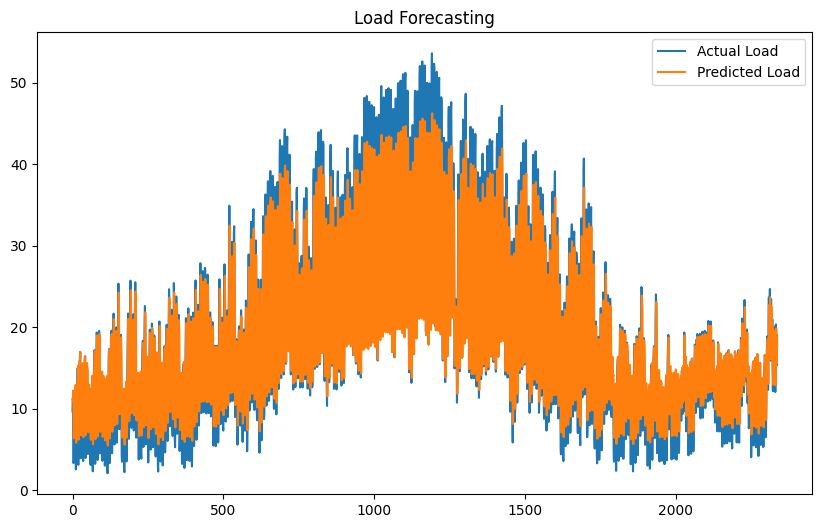

R² score: 0.7223374400865092


In [22]:
from sklearn.metrics import r2_score
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Load')
plt.plot(predictions_inv, label='Predicted Load')
plt.title('Load Forecasting')
plt.legend()
plt.show()
r2 = r2_score(y_test_inv, predictions_inv)
print(f'R² score: {r2}')